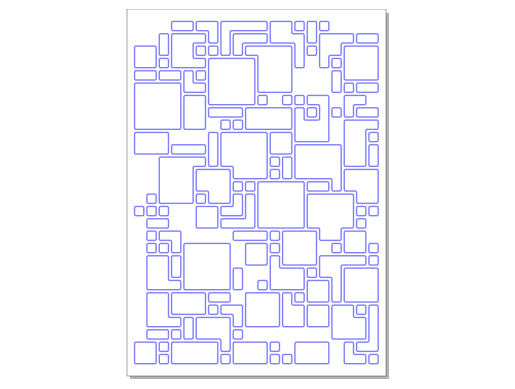

In [163]:
import math
import random
import vsketch
from shapely.geometry import GeometryCollection, Polygon
import shapely

vsk = vsketch.Vsketch()
vsk.size("a4") # 210 x 297 mm
vsk.scale("cm")

numrects = 200

border = Polygon([(0, 0), (0, 28), (20, 28), (20, 0)])

def make_rect(i):
  scale = random.randrange(1, 5)
  offset = (random.randrange(0, 20), random.randrange(0, 28))
  return shapely.transform(
    Polygon([(0, 0), (0, 1), (1, 1), (1, 0)]),
    lambda p: p * scale + offset)

rects = [ make_rect(i) for i in range(numrects) ]

for (i, rect) in enumerate(rects):
  for other in rects[:i]:
    rect = rect.difference(other)
  vsk.geometry(rect.intersection(border).buffer(-0.25).buffer(0.125))

vsk.display()